In [42]:
# autoreload
%load_ext autoreload
%autoreload 2

from milligrad.module import Module
from milligrad.tensor import Tensor, topological_sort

from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
class MLP(Module):
    def __init__(self):
        self.linear1 = Tensor.xavier(3, 4)
        self.linear2 = Tensor.xavier(4, 2)
        self.bias1 = Tensor.randn(4)
        self.bias2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = x @ self.linear1 + self.bias1
        x = x.relu()
        x = x @ self.linear2 + self.bias2
        return x.tanh()
    
    def parameters(self) -> list[Tensor]:
        return [self.linear1, self.linear2, self.bias1, self.bias2]
    
class Perceptron(Module):
    def __init__(self):
        self.W = Tensor.randn(3, 2)
        self.b = Tensor.randn(2)
        
    def __call__(self, x):
        return x @ self.W + self.b
    
    def parameters(self) -> list[Tensor]:
        return [self.W, self.b]

In [59]:

from milligrad.tensor import topological_sort

x = Tensor.randn(5, 3)
y = Tensor([[0.8, -0.3], [0.2, 0.1], [0.1, 0.2], [0.1, 0.3], [0.1, 0.4]])

mlp = MLP()
y_hat = mlp(x)
loss = ((y - y_hat)**2).sum().sum()

sorted_tensors = topological_sort(loss)
[x.name for x in sorted_tensors if x.name] # "" is falsy

['@', '+', 'relu', '@', '+', 'tanh', '-', '+', '**2', 'sum', 'sum']

In [ ]:
x = Tensor.randn(5, 3)
y = Tensor.zeros(5, 2)

In [65]:
model = Perceptron()

losses = []
for i in range(1000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    loss.backward()
    
    for param in model.parameters():
        param.data -= param.grad * 1e-3
        
    model.zero_grad()
    losses.append(loss.data)

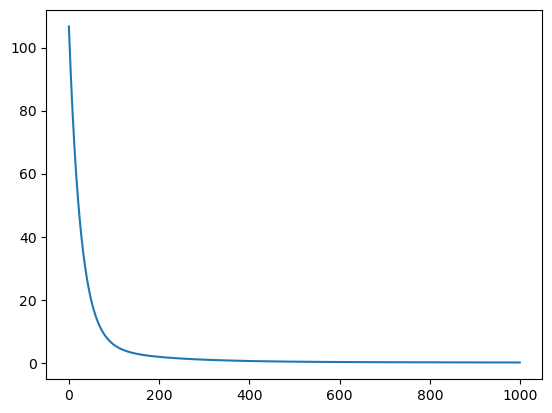

In [66]:
plt.plot(losses)